In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Import Data

In [3]:
df = pd.read_csv('diamonds_hw.csv')

In [4]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


Kolom-kolom dari dataset 'diamonds.csv' memiliki definisi sebagai berikut:
- price: price in US dollars ($326--$18,823)
- carat: weight of the diamond (0.2--5.01)
- cut: quality of the cut (Fair, Good, Very Good, Premium, Ideal)
- color: diamond colour, from J (worst) to D (best)
- clarity: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
- x: length in mm 
- y: width in mm 
- z: depth in mm 
- depth: total depth percentage = z / mean(x, y) = 2 * z / (x + y) 
- table: width of top of diamond relative to widest point


### Soal:

1. Terdapat beberapa kolom yang mengalami missing value. Tentukan metode terbaik untuk mengisi missing value pada kolom tersebut. Terapkan metode tersebut, dan berikan argumen Anda! (Tuliskan, "saya memilih metode __ untuk mengisi missing value pada kolom __ karena ___). 

2. Berdasarkan informasi terkait kolom `clarity`, lakukanlah encoding yang sesuai (ubahlah kolom `clarity` dari kategorikal menjadi numerik). 

2. Buatlah visualisasi boxplot untuk memeriksa distribusi pada kolom-kolom 'x', 'y', dan 'z'. Apakah ada data-data yang outlier? Jika ya, apa saja outlier yang muncul? Berapa banyak baris yang mengalami outlier?

In [5]:
#Memeriksa jumlah baris serta tipe data masing-masing kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53815 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


#### Nomor 1:

In [11]:
#Memeriksa jumlah missing value pada setiap kolom
df.isnull().sum()

carat      125
cut          0
color        0
clarity      0
depth        0
table        0
price        0
x            0
y            0
z            0
dtype: int64

In [83]:
#Ternyata missing value ada pada kolom carat dengan total missing value sebanyak 125
#Kemudian dilakukan pemeriksaan persentase missing values
total_missing = df['carat'].isnull().sum()
persentase_missing = (total_missing/df.shape[0])*100
persentase_missing

0.23173896922506487

In [23]:
#ternyata hanya ada 0,23 persen data yang hilang
#Karena sangat sedikit maka saya memilih untuk menghapus baris yang memiliki missing value
data_null = df['carat'].isnull()
df1 = df[~data_null]

Saya memilih metode menghapus baris data untuk mengatasi missing value pada kolom carat karena persentase missing value yang sangat sedikit (hanya 0,23%)

In [25]:
df1.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [74]:
df.columns[df.isnull().any()]

Index(['carat'], dtype='object')

Missing value sudah tidak ada

Untuk analisis selanjutnya menggunakan data yang missing valuenya telah dihapus

#### Nomor 2:

In [26]:
#Kolom clarity adalah ukuran seberapa jernih sebuah berlian (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
#Dilihat dari penjelasan dari kolom tersebut, terdapat tingkatan untuk setiap kategorinya, sehingga akan dilikukan rank encoding
clarity_class = {
    'I1':1,
    'SI2':2,
    'SI1':3,
    'VS2':4,
    'VS1':5,
    'VVS2':6,
    'VVS1':7,
    'IF':8
}
df1['clarity_diamond'] = df1['clarity'].map(clarity_class)

C:\Users\ramad\AppData\Local\Temp\ipykernel_18032\167001286.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['clarity_diamond'] = df1['clarity'].map(clarity_class)


In [27]:
df1.sample(5)

,carat,cut,color,clarity,depth,table,price,x,y,z,clarity_diamond
42107,0.58,Ideal,G,SI2,61.5,55.0,1276,5.38,5.42,3.32,2
815,0.71,Premium,H,VVS2,61.5,62.0,2863,5.74,5.68,3.51,6
51102,1.03,Premium,H,I1,62.9,59.0,2336,6.41,6.30,4.00,1
35064,0.30,Ideal,D,VS1,60.7,56.0,885,4.38,4.41,2.67,5
9677,1.52,Fair,H,I1,65.4,62.0,4648,7.10,7.02,4.62,1


Kolom clarity sudah diencoding pada kolom clarity_diamond

#### Nomor 3:

In [48]:
df1.describe()

,carat,depth,table,price,x,y,z,clarity_diamond
count,53815.000000,53815.000000,53815.000000,53815.000000,53815.000000,53815.000000,53815.000000,53815.000000
mean,0.797891,61.748957,57.456908,3932.365567,5.731029,5.734391,3.538625,4.050859
std,0.474043,1.432738,2.234689,3989.612741,1.121788,1.142218,0.705737,1.647234
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000,1.000000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000,3.000000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.520000,4.000000
75%,1.040000,62.500000,59.000000,5323.500000,6.540000,6.540000,4.040000,5.000000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000,8.000000


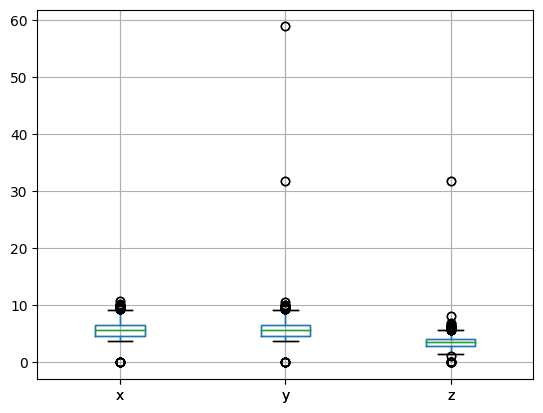

In [66]:
#Boxplot x,y, dan z
df1.boxplot(column=['x','y','z'])
plt.show()

Ternyata ada outlier pada kolom x,y dan z

Selanjutnya akan diperiksa jumlah dan baris mana saja yang termasuk outlier

In [33]:
#Membuat fungsi pendeteksi outlier
def outlier(data):
    q3 = data.quantile(0.75)
    q1 = data.quantile(0.25)
    iqr = q3-q1

    batas_bawah = q1 - 1.5 * iqr
    batas_atas = q3 + 1.5 * iqr

    return((data > batas_atas) | (data < batas_bawah))

In [42]:
#Mendeteksi outlier pada kolom x
outlier_x = df1[outlier(df['x'])]
outlier_x.sample(5)

C:\Users\ramad\AppData\Local\Temp\ipykernel_18032\2424472786.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  outlier_x = df1[outlier(df['x'])]


,carat,cut,color,clarity,depth,table,price,x,y,z,clarity_diamond
24520,1.56,Ideal,G,VS2,62.2,54.0,12800,0.00,0.00,0.00,4
26243,1.20,Premium,D,VVS1,62.1,59.0,15686,0.00,0.00,0.00,7
24816,3.00,Premium,G,I1,59.7,60.0,13203,9.42,9.26,5.58,1
27649,3.01,Good,H,SI2,57.6,64.0,18593,9.44,9.38,5.42,2
22741,3.01,Fair,H,I1,56.1,62.0,10761,9.54,9.38,5.31,1


In [43]:
#Total outlier pada kolom x
outlier_x.shape[0]

32

In [44]:
#Mendeteksi outlier pada kolom y
outlier_y = df1[outlier(df['y'])]
outlier_y.sample(5)

C:\Users\ramad\AppData\Local\Temp\ipykernel_18032\3596064645.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  outlier_y = df1[outlier(df['y'])]


,carat,cut,color,clarity,depth,table,price,x,y,z,clarity_diamond
26534,3.67,Premium,I,I1,62.4,56.0,16193,9.86,9.81,6.13,1
26243,1.20,Premium,D,VVS1,62.1,59.0,15686,0.00,0.00,0.00,7
27415,5.01,Fair,J,I1,65.5,59.0,18018,10.74,10.54,6.98,1
25998,4.01,Premium,I,I1,61.0,61.0,15223,10.14,10.10,6.17,1
49557,0.71,Good,F,SI2,64.1,60.0,2130,0.00,0.00,0.00,2


In [45]:
#Total outlier pada kolom y
outlier_y.shape[0]

29

In [46]:
#Mendeteksi outlier pada kolom z
outlier_z = df1[outlier(df['z'])]
outlier_z.sample(5)

C:\Users\ramad\AppData\Local\Temp\ipykernel_18032\178501717.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  outlier_z = df1[outlier(df['z'])]


,carat,cut,color,clarity,depth,table,price,x,y,z,clarity_diamond
27515,3.01,Fair,I,SI2,65.8,56.0,18242,8.99,8.94,5.90,2
23644,3.65,Fair,H,I1,67.1,53.0,11668,9.53,9.48,6.38,1
27630,4.50,Fair,J,I1,65.8,58.0,18531,10.23,10.16,6.72,1
27429,2.25,Premium,H,SI2,62.8,59.0,18034,0.00,0.00,0.00,2
26194,2.01,Fair,G,SI2,65.6,56.0,15562,7.89,7.84,6.16,2


In [70]:
#Total outlier pada kolom z
outlier_z.shape[0]

49